# SKLearn

La biblioteca sklearn proporciona una lista de "conjuntos de datos de juguetes" con el
fin de probar algoritmos de aprendizaje automático. Los datos se devuelven de las
siguientes:
* load_boston() Precios de la vivienda de Boston por regresión
* load_iris() El conjunto de datos de iris para la clasificación
* load_diabetes() El conjunto de datos de diabetes para regresión
* load_digits() Imágenes de dígitos para clasificación
* load_linnerud() El conjunto de datos linnerud para regresión multivariante
* load_wine() El conjunto de datos del vino para la clasificación
* load_breast_cancer() El conjunto de datos de cáncer de mama para clasificación

## Load_Boston Dataset

Paso 1: importando librerías necesarias

In [2]:
import numpy as np #Mejora el soporte para vectores y matrices
import pandas as pd #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
import seaborn as sns #interfaz mejorada para dibujar gráficos estadísticos (basada en matplotlib)


Paso 2: cargamos los datos de la biblioteca scikit-learn

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

Paso 3: Conociendo los datos que tiene el dataset

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Paso 4: Conociendo las caracteristicas que tienen los datos

In [5]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

Paso 5: Creamos una tabla de datos usando pandas (facilita el manejo)

In [6]:
#creamos una tabla (tipo excel, con titulos para faciliar la manipulación)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head() #imprimimos las primeras 5 filas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#Agregamos en la tabla los valores de target del dataset
boston['MEDV'] = boston_dataset.target

## P1T4-1: Ejercicio

Usando pandas en LOAD_BOSTON, determine (15 minutos)
* Cuantos registros tiene el dataset (rows)
* Cuántos datos tiene cada registro (columns)
* Hay datos nulos (null) en el dataset?


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


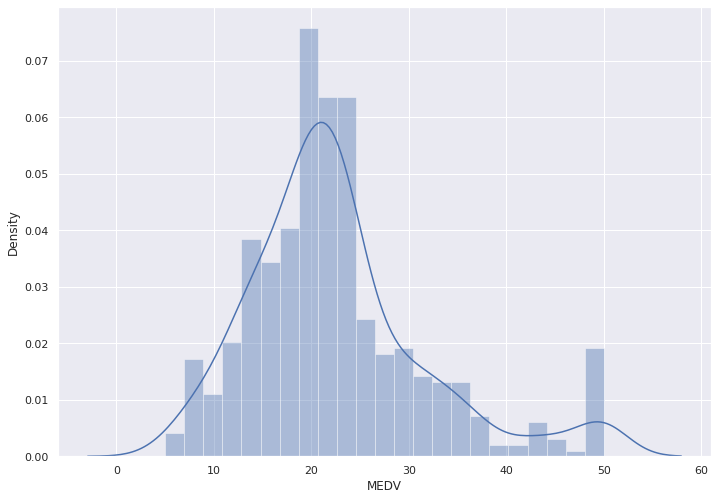

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del grafico
sns.distplot(boston['MEDV']) #agregamos los datos
plt.show() #visualizamos el grafico

## Trabajando con todas las variables

Librerias:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
boston_data = datasets.load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Separar los datos (train y test)

In [17]:
scalar = StandardScaler()
y = boston_data.target
x = boston_df.values #tomaremos todos los columnas para entrenar
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("TRAIN--> X: {} - Y: {}".format(X_train.shape,y_train.shape))
print("TEST--> X: {} - Y: {}".format(X_test.shape,y_test.shape))

TRAIN--> X: (404, 13) - Y: (404,)
TEST--> X: (102, 13) - Y: (102,)


Aplicar regresion lineal

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#entrenamos
regressor.fit(X_train, y_train)
#predecimos
pred = regressor.predict(X_test)


Visualizar regresion

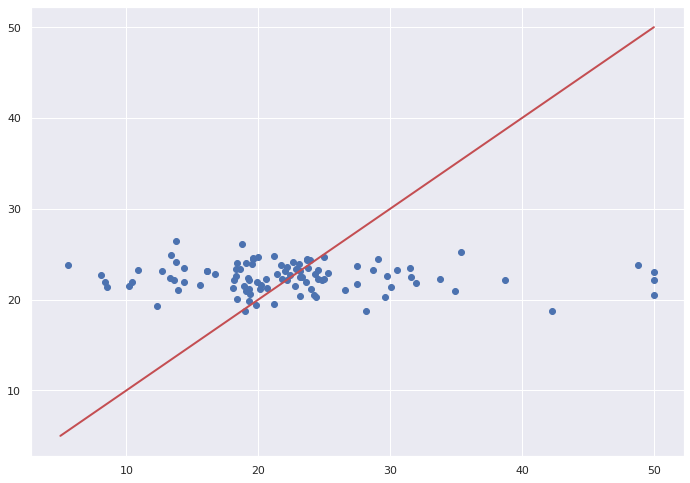

Precisión del modelo: -0.06267748044501631


In [19]:
#visualizar la predicción en los datos de testeo
plt.scatter(y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(X_test, y_test)))